In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load the dataset
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Data Overview
df.shape

(284807, 31)

In [5]:
print("Number of rows : ", df.shape[0])
print("Number of Columns : ", df.shape[1])

Number of rows :  284807
Number of Columns :  31


In [6]:
print("Column Names:", df.columns)

Column Names: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [7]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
# Check for Missing Values:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
#  Check class distribution
print("Class Distribution:\n", df['Class'].value_counts())

Class Distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


In [12]:
#  Check feature types
numerical_features = df.select_dtypes(include=["float64", "int64"]).columns
categorical_features = df.select_dtypes(include=["object"]).columns
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
Categorical Features: Index([], dtype='object')


In [13]:
# Feature Standardization

from sklearn.preprocessing import StandardScaler

# Select numerical columns for standardization
numerical_cols = ['Amount', 'Time']  # Example of numerical columns to standardize

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


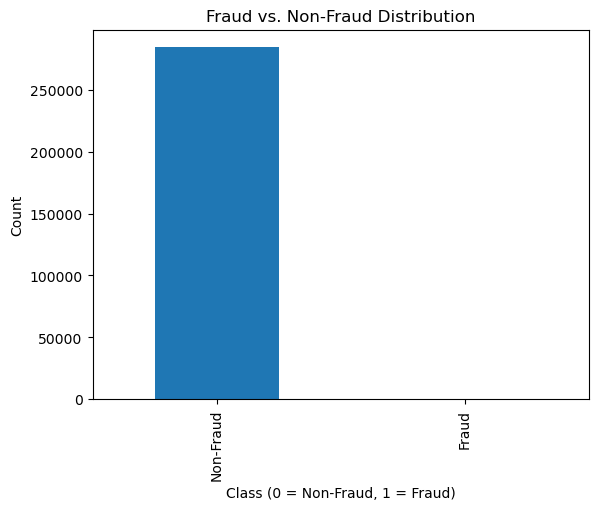

In [14]:
# Exploratory Data Analysis (EDA)
# Class Imbalance Visualization
# Fraud vs. Non-Fraud Distribution

import matplotlib.pyplot as plt
df['Class'].value_counts().plot(kind='bar')
plt.title('Fraud vs. Non-Fraud Distribution')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()


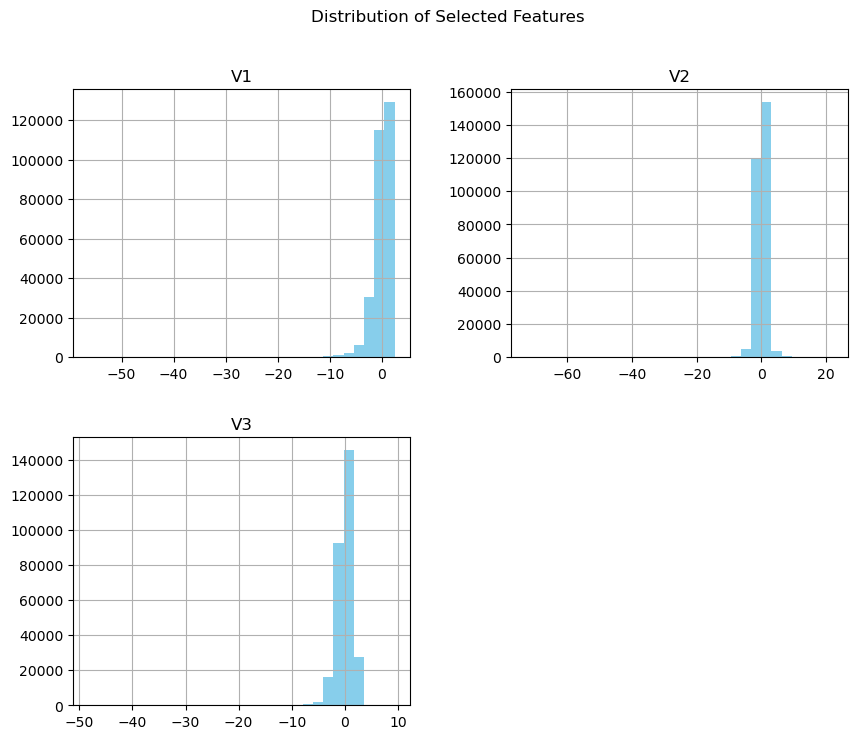

In [15]:
# Visualize numerical features (select a few for clarity)
selected_features = ['V1', 'V2', 'V3']  # Replace with meaningful feature columns
df[selected_features].hist(figsize=(10, 8), bins=30, color='skyblue')
plt.suptitle("Distribution of Selected Features")
plt.show()

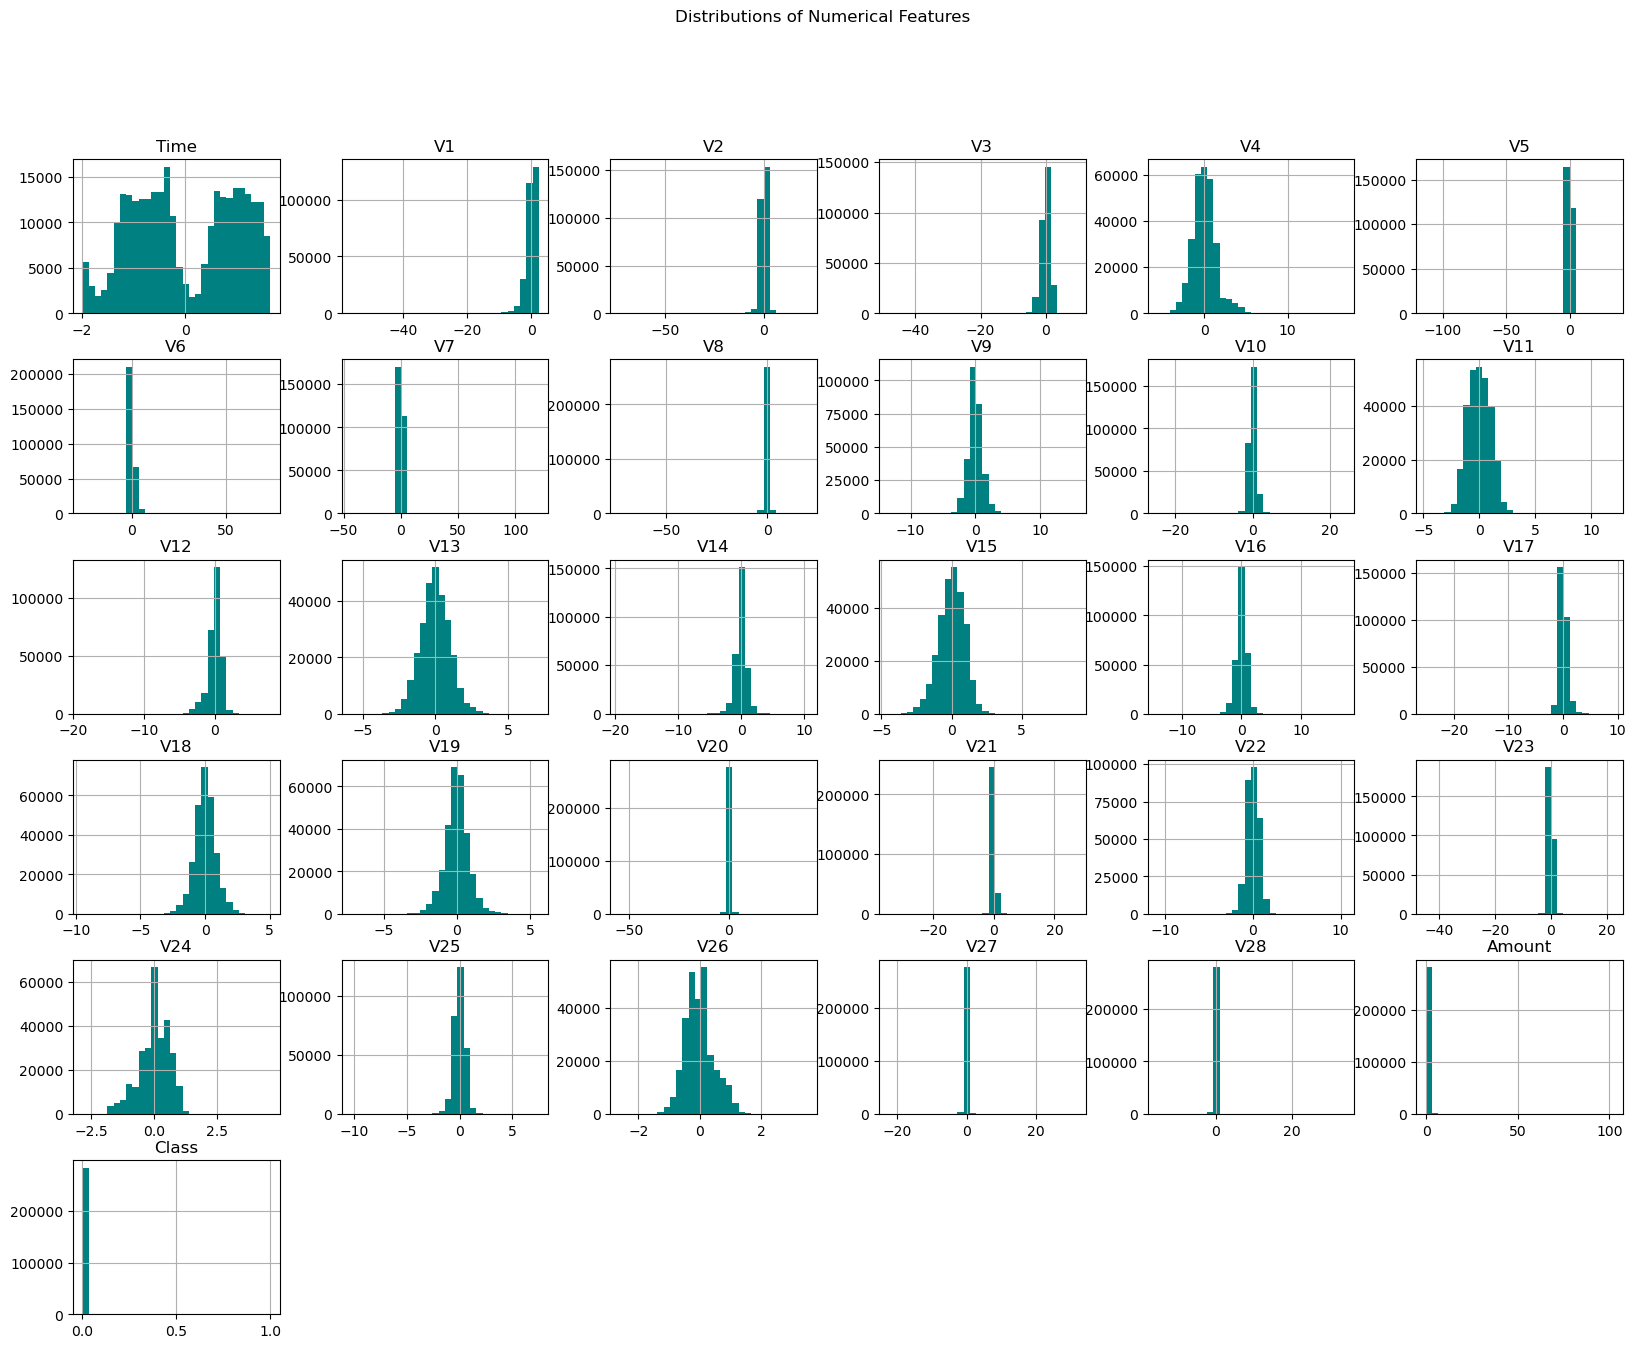

In [16]:
# Histograms for numerical features
df.select_dtypes(include=np.number).hist(figsize=(20, 15), bins=30, color='teal')
plt.suptitle("Distributions of Numerical Features")
plt.show()

Text(0.5, 1.0, 'Amount Distribution with Outliers')

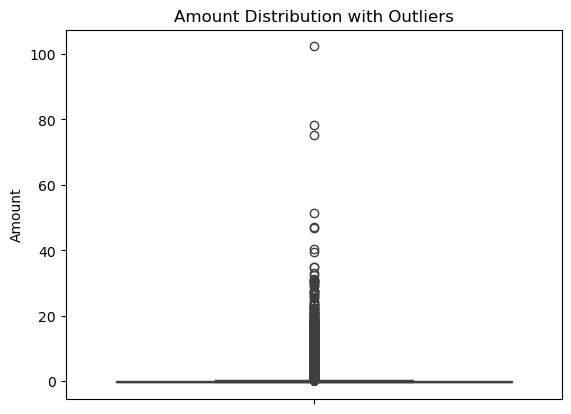

In [17]:
import seaborn as sns
sns.boxplot(df['Amount'])
plt.title('Amount Distribution with Outliers')


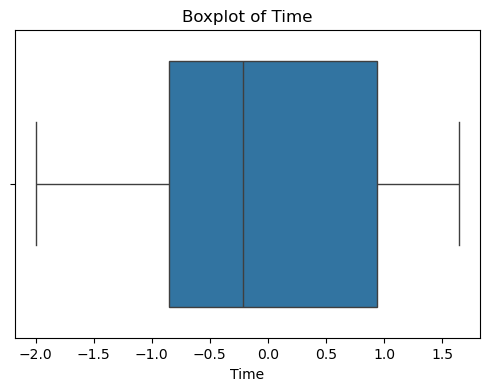

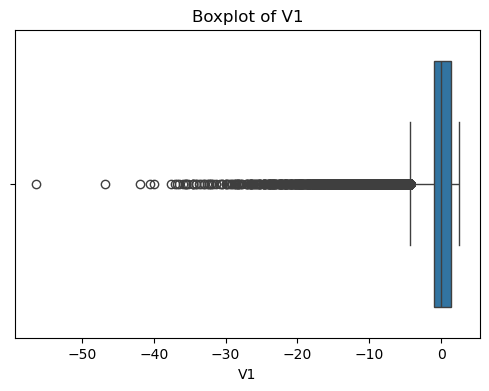

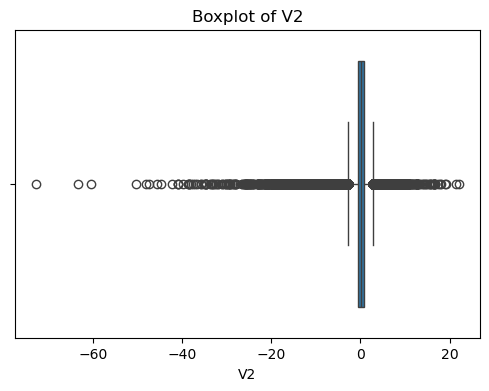

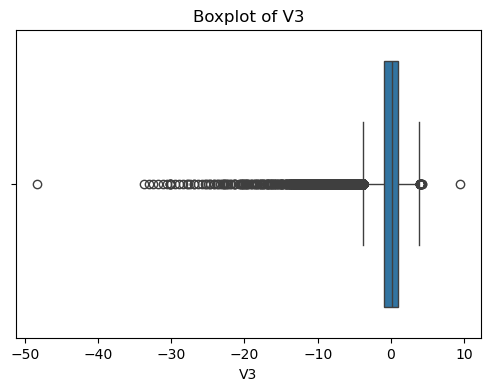

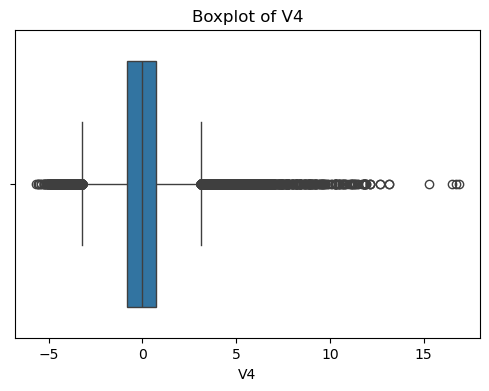

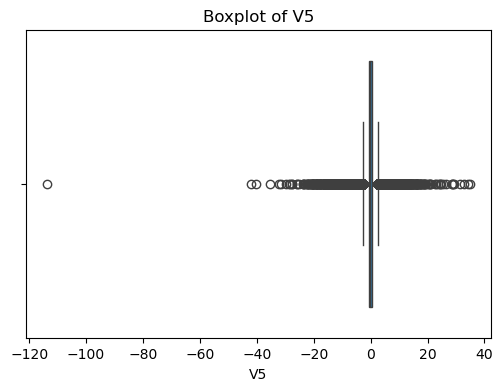

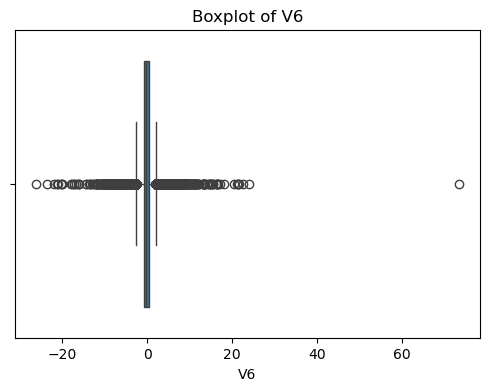

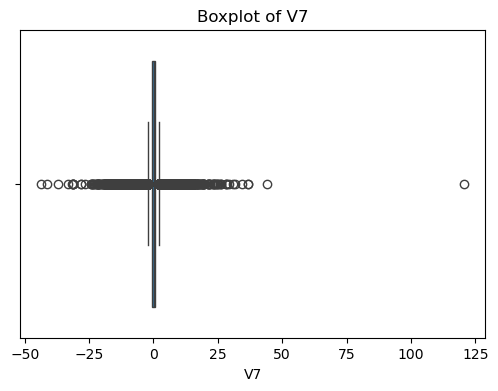

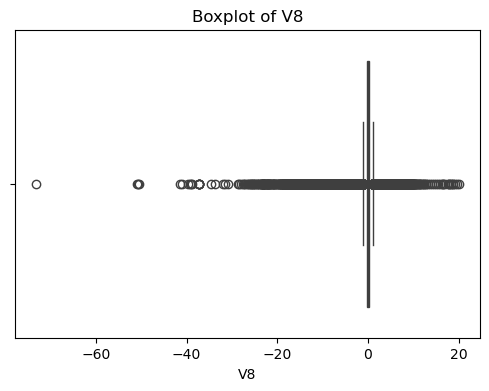

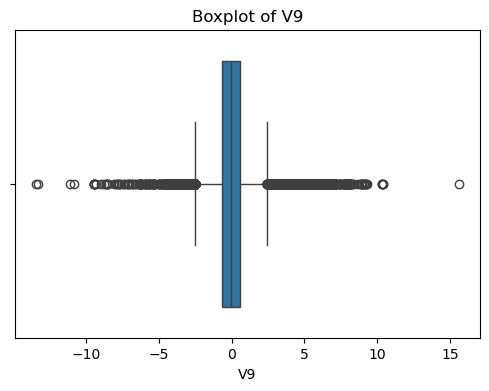

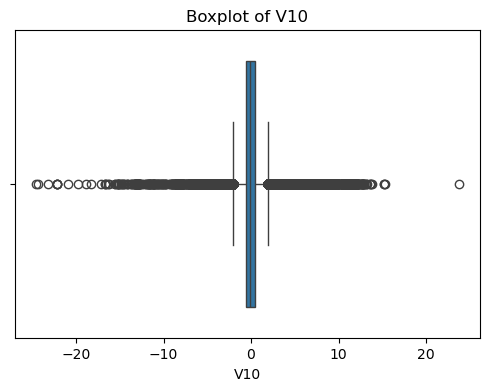

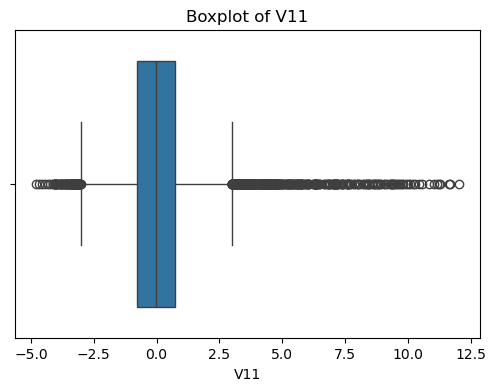

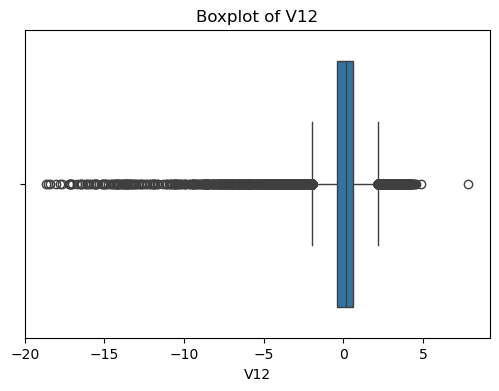

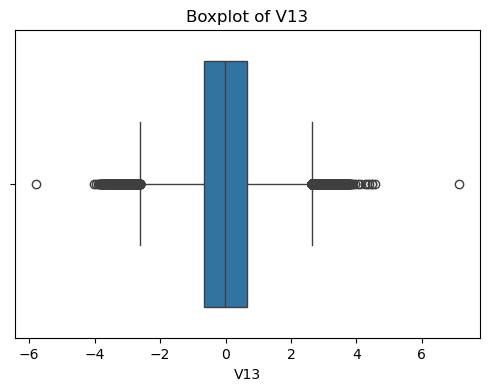

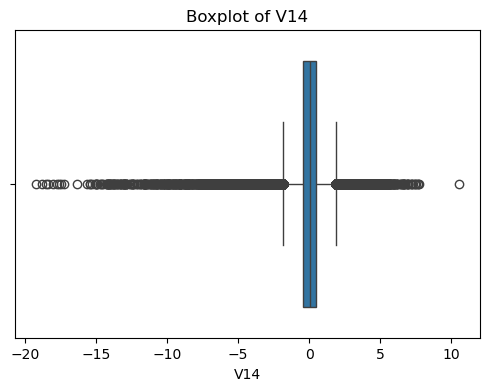

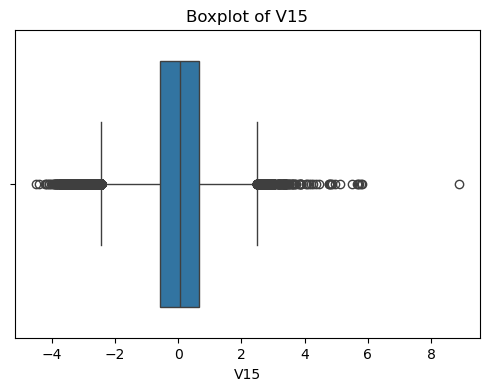

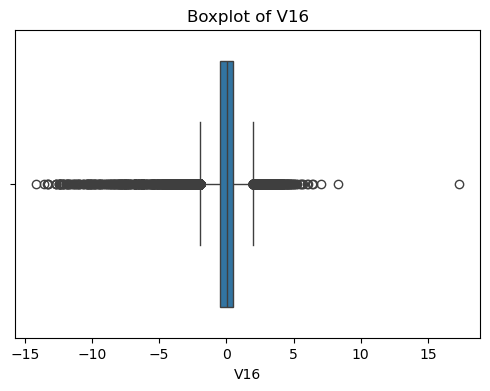

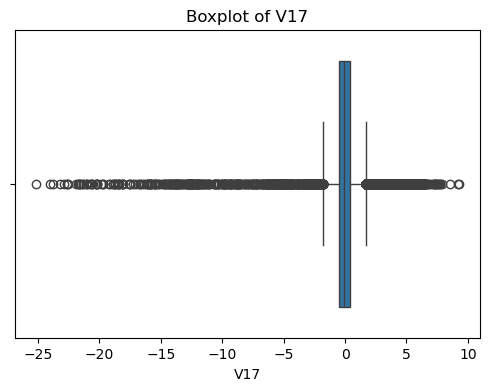

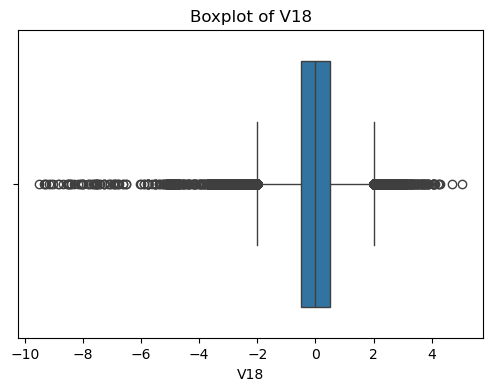

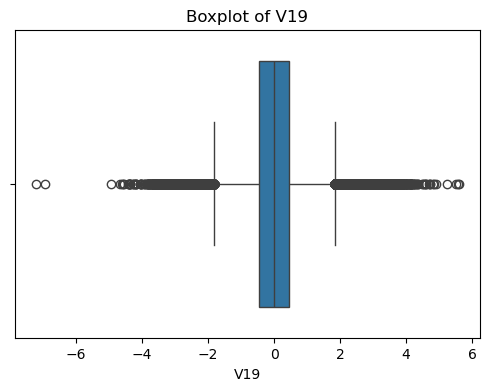

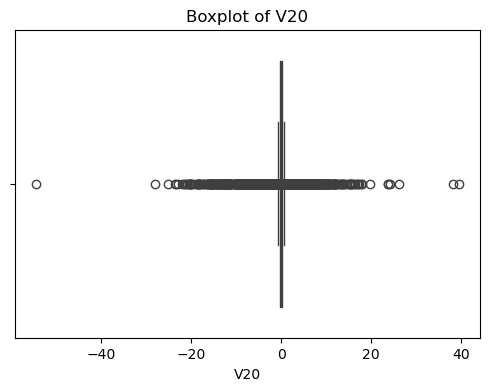

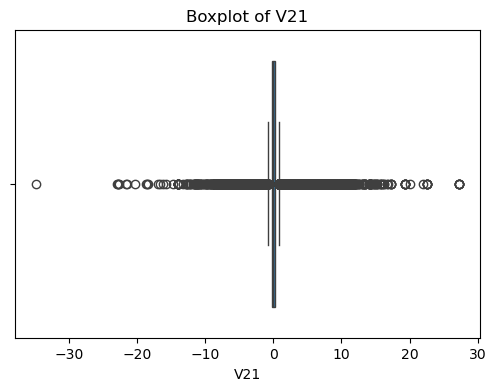

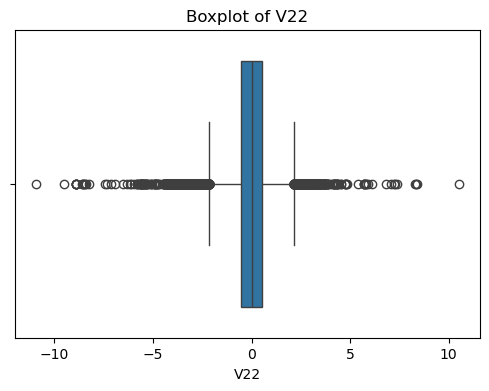

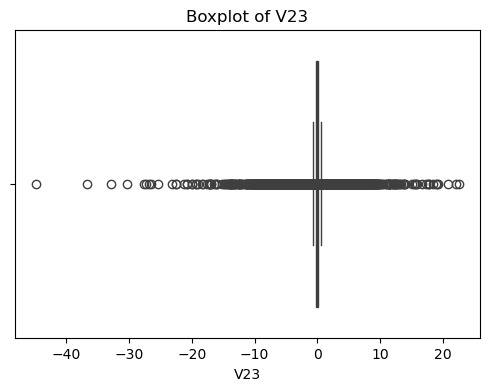

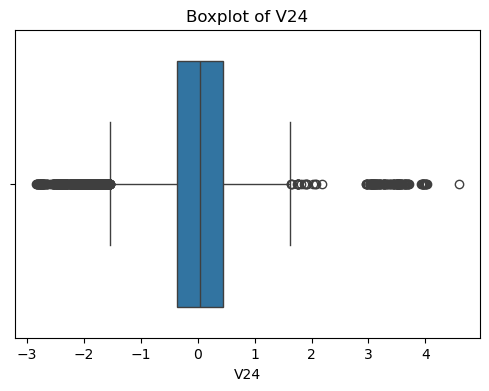

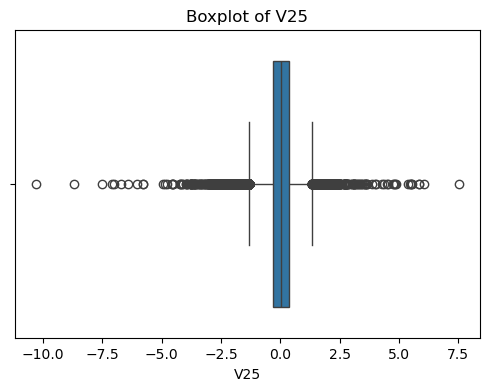

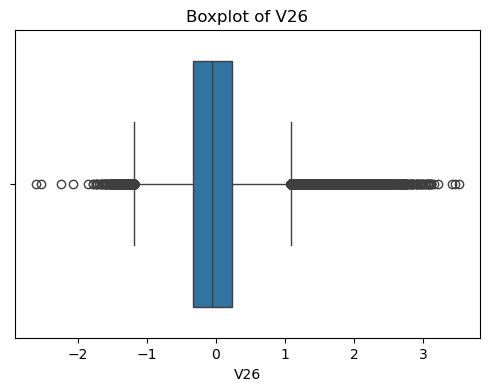

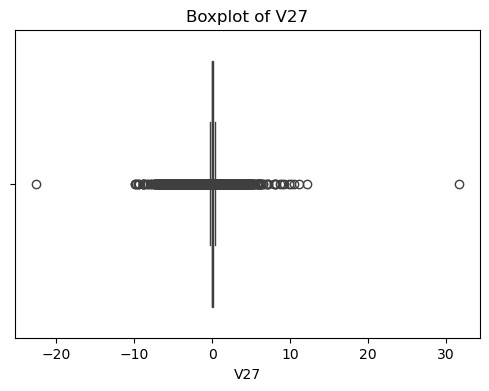

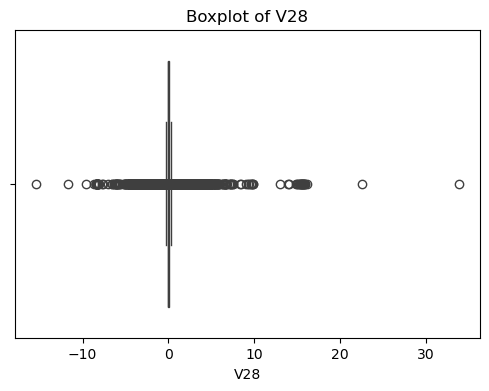

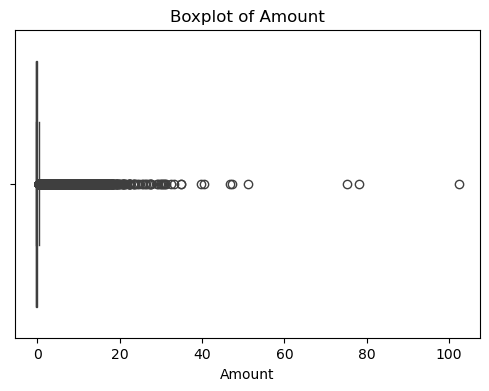

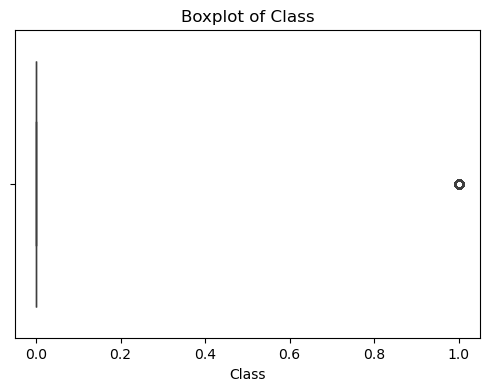

In [18]:
# Step 4: Detect outliers with boxplots
for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

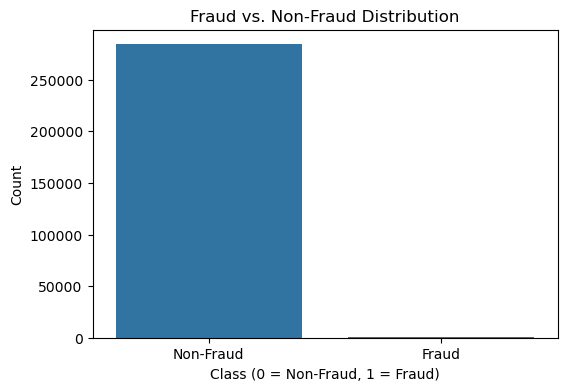

In [19]:
# Class Imbalance Visualization
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title("Fraud vs. Non-Fraud Distribution")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

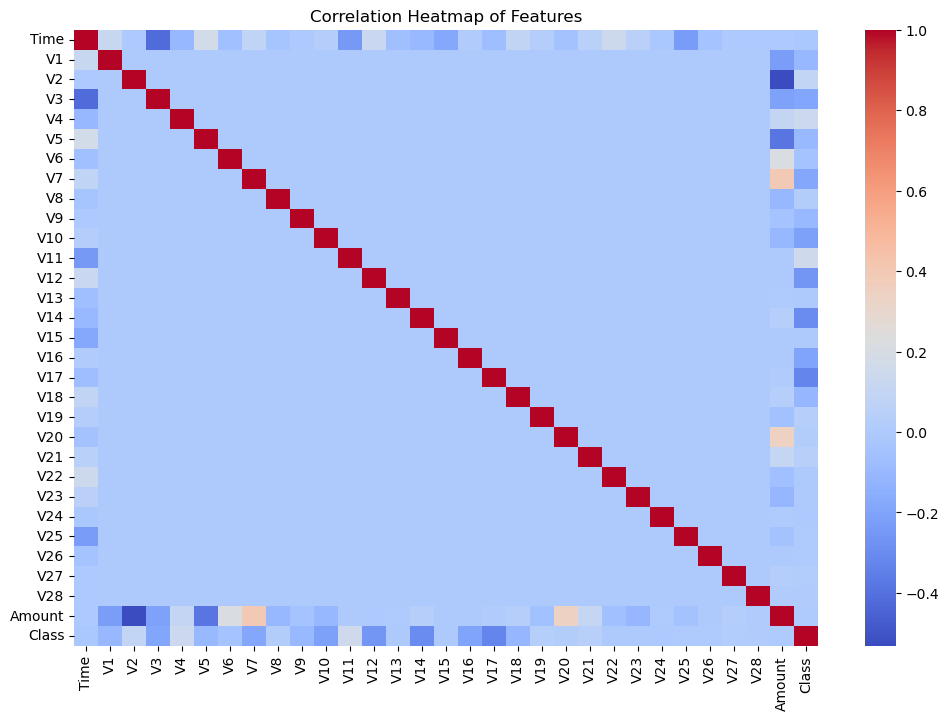

In [20]:
# Feature Correlation
import seaborn as sns

# Calculate the correlation matrix
corr = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

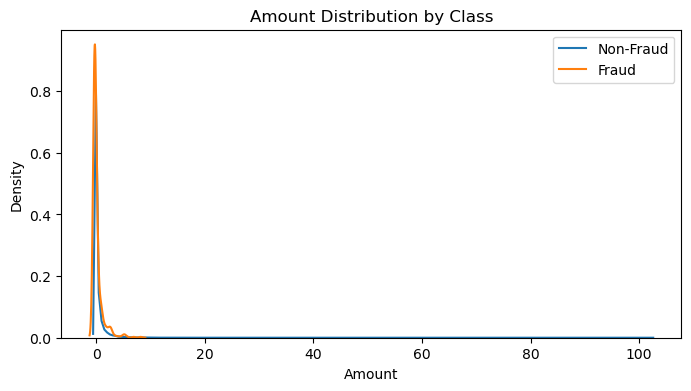

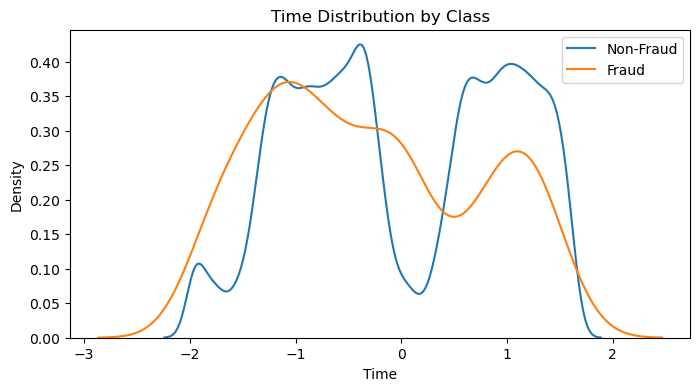

In [21]:
# Density plot for fraudulent vs. non-fraudulent transactions
for feature in ['Amount', 'Time']:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df[df['Class'] == 0][feature], label='Non-Fraud')
    sns.kdeplot(df[df['Class'] == 1][feature], label='Fraud')
    plt.title(f'{feature} Distribution by Class')
    plt.legend()
    plt.show()

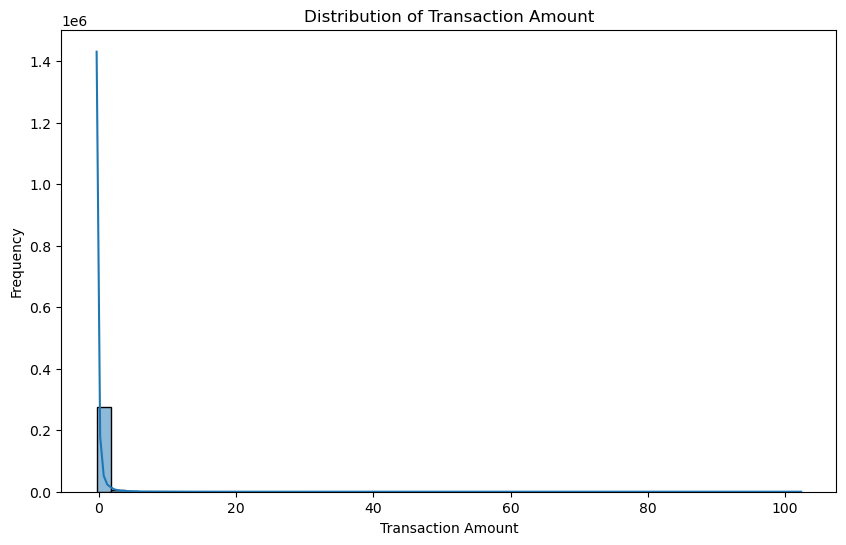

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting histogram for transaction amount
plt.figure(figsize=(10,6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Distribution of Transaction Amount")
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

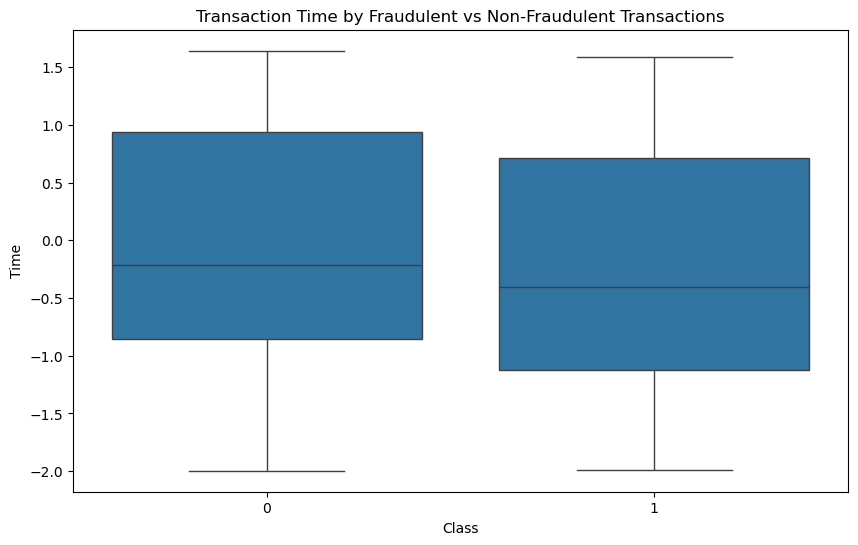

In [23]:
# compare distribution of 'Time' feature
plt.figure(figsize=(10,6))
sns.boxplot(x='Class', y='Time', data=df)
plt.title('Transaction Time by Fraudulent vs Non-Fraudulent Transactions')
plt.show()

In [24]:
# Checking Missing Values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [25]:
# Handling Missing Values
df.fillna(df.mean(), inplace=True)
# Mean/Median Imputation
# df['Amount'].fillna(df['Amount'].median(), inplace=True)
# df['Time'].fillna(df['Time'].mean(), inplace=True)

df['Amount'] = df['Amount'].fillna(df['Amount'].median())
df['Time'] = df['Time'].fillna(df['Time'].mean())


In [26]:
# Removal 
df_cleaned = df.dropna()

In [27]:
df.duplicated().any()


True

In [28]:
df = df.drop_duplicates()

In [29]:
df.shape

(283726, 31)

In [30]:
# Outlier Detection and Treatment
# Z-score Method

from scipy import stats

# Subset non-fraud transactions
df_non_fraud = df[df['Class'] == 0]

# Calculate Z-scores for 'Amount' and 'Time' columns within non-fraud transactions
z_scores = np.abs(stats.zscore(df_non_fraud[['Amount', 'Time']]))

In [31]:
# Z-score for outlier detection
outliers = (z_scores > 3).sum(axis=0)
print("Outlier Counts by Feature:\n", outliers)

Outlier Counts by Feature:
 Amount    4052
Time         0
dtype: int64


In [32]:
# Interquartile Range (IQR) Method
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Amount'] < (Q1 - 1.5 * IQR)) | (df['Amount'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers in 'Amount': {len(outliers)}")

# Capping outliers
df['Amount'] = df['Amount'].clip(lower=lower_bound, upper=upper_bound)



Number of outliers in 'Amount': 31685


In [33]:
# Focus on Non-Fraud Transactions
df_non_fraud = df[df['Class'] == 0]
df_cleaned = df_non_fraud[(df_non_fraud['Amount'] >= lower_bound) & (df_non_fraud['Amount'] <= upper_bound)]


In [34]:
df_fraud = df[df['Class'] == 1]
df_final = pd.concat([df_cleaned, df_fraud], axis=0)



In [35]:
class_names = {0:'Not Fraud', 1:'Fraud'}
print(df.Class.value_counts().rename(index = class_names))
print('------------------------')
# Determine number of fraud cases in dataset
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]
outlierFraction = len(df_fraud)/float(len(df_non_fraud))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0])))

Class
Not Fraud    283253
Fraud           473
Name: count, dtype: int64
------------------------
0.0016698852262818046
Fraud Cases: 473
Valid Transactions: 283253


In [36]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


count    473.000000
mean      -0.117502
std        0.290915
min       -0.353229
25%       -0.349231
50%       -0.313968
75%        0.070128
max        0.387916
Name: Amount, dtype: float64

In [37]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


count    283253.000000
mean         -0.145803
std           0.247456
min          -0.353229
25%          -0.330560
50%          -0.265271
75%          -0.043538
max           0.387916
Name: Amount, dtype: float64

In [38]:
# Fraud Correlation
fraud_correlation = df.corr()['Class'].sort_values(ascending=False)
print(fraud_correlation)

Class     1.000000
V11       0.149067
V4        0.129326
V2        0.084624
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
V28       0.009682
V22       0.004887
Amount    0.004664
V26       0.004265
V25       0.003202
V15      -0.003300
V13      -0.003897
V23      -0.006333
V24      -0.007210
Time     -0.012359
V6       -0.043915
V5       -0.087812
V9       -0.094021
V1       -0.094486
V18      -0.105340
V7       -0.172347
V3       -0.182322
V16      -0.187186
V10      -0.206971
V12      -0.250711
V14      -0.293375
V17      -0.313498
Name: Class, dtype: float64


In [39]:
df.describe()
# Summary statistics

# Summary Statistics for Amount (Fraudulent vs Non-Fraudulent)
fraudulent = df[df['Class'] == 1]['Amount']
non_fraudulent = df[df['Class'] == 0]['Amount']

print("Fraudulent Transactions - Amount Statistics")
print(fraudulent.describe())

print("\nNon-Fraudulent Transactions - Amount Statistics")
print(non_fraudulent.describe())

Fraudulent Transactions - Amount Statistics
count    473.000000
mean      -0.117502
std        0.290915
min       -0.353229
25%       -0.349231
50%       -0.313968
75%        0.070128
max        0.387916
Name: Amount, dtype: float64

Non-Fraudulent Transactions - Amount Statistics
count    283253.000000
mean         -0.145803
std           0.247456
min          -0.353229
25%          -0.330560
50%          -0.265271
75%          -0.043538
max           0.387916
Name: Amount, dtype: float64


In [40]:
df.shape

(283726, 31)

In [41]:
# Handling Imbalanced Data
# Under-sampling (reduce non-fraud samples)

from imblearn.under_sampling import RandomUnderSampler

# Define the undersampler
undersample = RandomUnderSampler(sampling_strategy='auto')  # 'auto' means balance the minority class
X = df.drop(columns='Class')    # All features except the target column
y = df['Class']                 # Target variable (fraud or non-fraud)

X_resampled, y_resampled = undersample.fit_resample(X, y)
# Merge back the resampled data
df_under = pd.concat([X_resampled, y_resampled], axis=1)

In [42]:
X = df.drop(columns='Class',axis=1)    # All features except the target column
y = df['Class']                 # Target variable (fraud or non-fraud)


In [43]:
X.shape

(283726, 30)

In [44]:
y.shape

(283726,)

In [45]:
# Over-sampling (e.g., SMOTE):
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [46]:
y_resampled.value_counts()

Class
0    283253
1    283253
Name: count, dtype: int64

In [47]:
# Feature Selection
# 1.Mutual Information

from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X, y)
feature_importance = pd.Series(mutual_info, index=X.columns)
print(feature_importance.sort_values(ascending=False))

V17       0.007873
V14       0.007746
V12       0.007220
V10       0.007150
V11       0.006450
V16       0.005752
V4        0.004587
V3        0.004583
V18       0.003875
V9        0.003854
V7        0.003630
V2        0.002920
Amount    0.002629
V27       0.002166
V21       0.002139
V5        0.002068
V6        0.002000
V1        0.001851
V28       0.001607
V8        0.001600
Time      0.001394
V19       0.001132
V20       0.000904
V23       0.000471
V24       0.000364
V25       0.000253
V26       0.000239
V22       0.000126
V13       0.000085
V15       0.000023
dtype: float64


In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)


In [49]:
# Train-Test Split
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Check the distribution of the classes in the train and test sets
print("Train Class Distribution:")
print(y_train.value_counts(normalize=True))
print("\nTest Class Distribution:")
print(y_test.value_counts(normalize=True))



Train Class Distribution:
Class
0    0.500415
1    0.499585
Name: proportion, dtype: float64

Test Class Distribution:
Class
1    0.501659
0    0.498341
Name: proportion, dtype: float64


In [50]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)


In [51]:
# Model Selection
# Create the logistic regression model with class weights
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(class_weight='balanced', random_state=42,solver='saga', max_iter=1000)

# Fit the model to the training data
lr_model.fit(X_train, y_train)



LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42,
                   solver='saga')

In [52]:
# Model Selection
# Create the logistic regression model with class weights

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix
# Initialize and train model
lr_model = LogisticRegression(class_weight='balanced', random_state=42, solver='saga', max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred1 = lr_model.predict(X_test)
y_prob1 = lr_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Precision:", precision_score(y_test, y_pred1))
print("Recall:", recall_score(y_test, y_pred1))
print("F1 Score:", f1_score(y_test, y_pred1))
print("AUC-ROC:", roc_auc_score(y_test, y_prob1))


Accuracy: 0.9456673315563715
Precision: 0.9727450797500233
Recall: 0.917398265275603
F1 Score: 0.9442613451160768
AUC-ROC: 0.9881007915863079


In [53]:
# Random Forest 

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [54]:
# Create the Random Forest model with class weights

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

y_pred2 = rf_model.predict(X_test)
y_prob2 = rf_model.predict_proba(X_test)[:, 1]


# Evaluate using the same metrics as above
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Precision:", precision_score(y_test, y_pred2))
print("Recall:", recall_score(y_test, y_pred2))
print("F1 Score:", f1_score(y_test, y_pred2))
print("AUC-ROC:", roc_auc_score(y_test, y_prob2))


Accuracy: 0.999894088365607
Precision: 0.9997889219186997
Recall: 1.0
F1 Score: 0.9998944498196851
AUC-ROC: 0.9999985858288867


In [55]:
# Model Evaluation
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56463
           1       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



<Axes: >

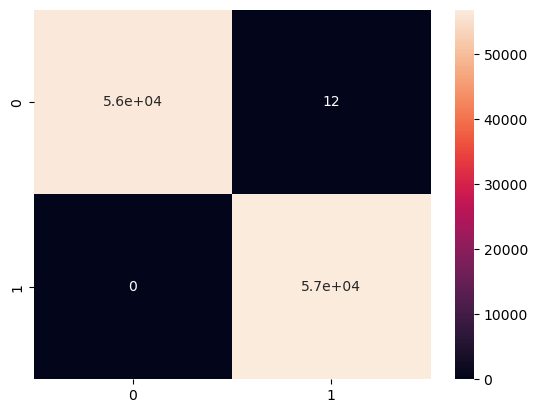

In [56]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot=True)

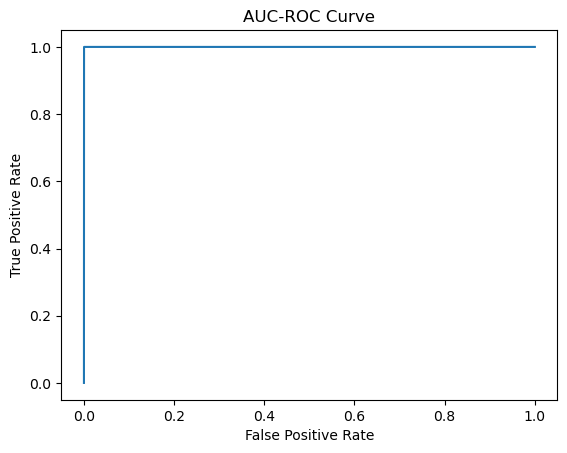

In [57]:
# 2. AUC-ROC Curve: Plot to evaluate model performance visually.
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
plt.plot(fpr, tpr)
plt.title('AUC-ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [58]:
# Gradient Boosting (XGBoost/LightGBM)

from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, scale_pos_weight=len(y_train) / sum(y_train), random_state=42)
xgb_model.fit(X_train, y_train)

y_pred3 = xgb_model.predict(X_test)
y_prob3 = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate using the same metrics as above
print("Accuracy:", accuracy_score(y_test, y_pred3))
print("Precision:", precision_score(y_test, y_pred3))
print("Recall:", recall_score(y_test, y_pred3))
print("F1 Score:", f1_score(y_test, y_pred3))
print("AUC-ROC:", roc_auc_score(y_test, y_prob3))


Accuracy: 0.9947926779756756
Precision: 0.9914035608827075
Recall: 0.9982758317352523
F1 Score: 0.994827828038432
AUC-ROC: 0.9998387316778424


In [59]:
# Gradient Boosting (XGBoost/LightGBM)
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(scale_pos_weight=len(y_train) / sum(y_train))
lgb_model.fit(X_train, y_train)

y_pred = lgb_model.predict(X_test)
y_prob = lgb_model.predict_proba(X_test)[:, 1]

# Evaluate using the same metrics as above
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_prob))


[LightGBM] [Info] Number of positive: 226414, number of negative: 226790
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.223638 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 453204, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499585 -> initscore=-0.001659
[LightGBM] [Info] Start training from score -0.001659
Accuracy: 0.9988084941130784
Precision: 0.9976479674225935
Recall: 0.9999824064462781
F1 Score: 0.9988138229169412
AUC-ROC: 0.9999330671892899


In [60]:
from sklearn.ensemble import StackingClassifier

base_estimators = [
    ('lr', LogisticRegression(class_weight='balanced', random_state=42, solver='saga', max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=None, class_weight='balanced', random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, scale_pos_weight=len(y_train) / sum(y_train), random_state=42))
]

stack_model = StackingClassifier(estimators=base_estimators, final_estimator=LogisticRegression(class_weight='balanced', random_state=42, max_iter=500), n_jobs=-1)
stack_model.fit(X_train, y_train)

y_pred_stack = stack_model.predict(X_test)
y_prob_stack = stack_model.predict_proba(X_test)[:, 1]

Logistic Regression:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     56463
           1       0.97      0.92      0.94     56839

    accuracy                           0.95    113302
   macro avg       0.95      0.95      0.95    113302
weighted avg       0.95      0.95      0.95    113302

Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56463
           1       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302

XGBoost:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56463
           1       0.99      1.00      0.99     56839

    accuracy                           0.99    113302
   macro avg       0.99      0.99      0.99    113302
weighted avg       0.99   

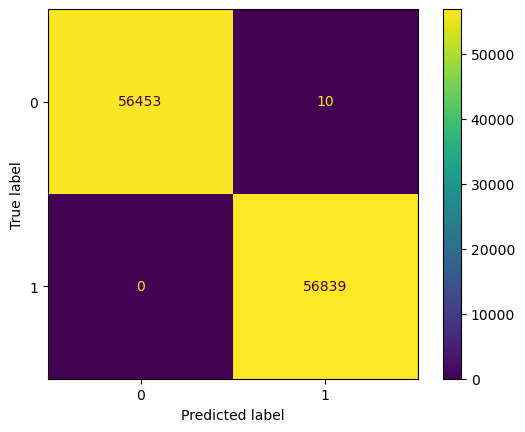

In [61]:
# Evaluation Metrics for Ensemble Models

from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Print classification reports
print("Logistic Regression:\n", classification_report(y_test, y_pred1))
print("Random Forest:\n", classification_report(y_test, y_pred2))
print("XGBoost:\n", classification_report(y_test, y_pred3))
print("Stacking:\n", classification_report(y_test, y_pred_stack))

# AUC-ROC scores
print("Logistic Regression AUC-ROC:", roc_auc_score(y_test, y_prob1))
print("Random Forest AUC-ROC:", roc_auc_score(y_test, y_prob2))
print("XGBoost AUC-ROC:", roc_auc_score(y_test, y_prob3))
print("Stacking AUC-ROC:", roc_auc_score(y_test, y_prob_stack))

# Plot confusion matrix for the best-performing model
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_stack)

In [62]:
final_data = pd.DataFrame({'Models':['LR','RF','XGB'], 
                          "ACC":[accuracy_score(y_test, y_pred1)*100,
                                 accuracy_score(y_test, y_pred2)*100,
                                 accuracy_score(y_test, y_pred3)*100
                                ]})

In [63]:
final_data

,Models,ACC
0,LR,94.566733
1,RF,99.989409
2,XGB,99.479268


<Axes: xlabel='Models', ylabel='ACC'>

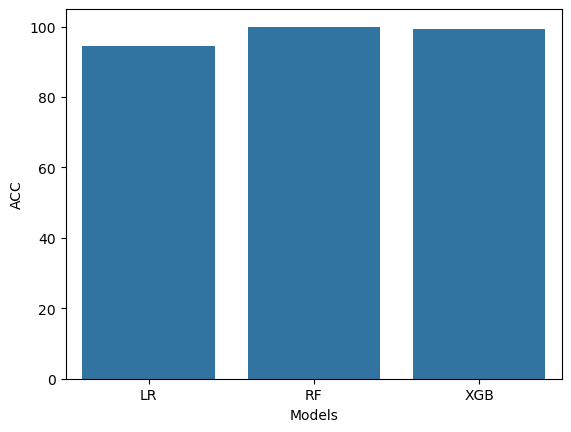

In [64]:
sns.barplot(x='Models', y='ACC', data=final_data)


In [65]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, verbose=3, cv=3)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END ....max_depth=10, n_estimators=100;, score=0.987 total time= 6.7min
[CV 2/3] END ....max_depth=10, n_estimators=100;, score=0.989 total time= 6.5min
[CV 3/3] END ....max_depth=10, n_estimators=100;, score=0.989 total time= 6.3min
[CV 1/3] END ....max_depth=10, n_estimators=200;, score=0.988 total time=13.4min
[CV 2/3] END ....max_depth=10, n_estimators=200;, score=0.989 total time=14.1min
[CV 3/3] END ....max_depth=10, n_estimators=200;, score=0.989 total time=13.5min
[CV 1/3] END ....max_depth=20, n_estimators=100;, score=1.000 total time= 9.1min
[CV 2/3] END ....max_depth=20, n_estimators=100;, score=1.000 total time= 9.3min
[CV 3/3] END ....max_depth=20, n_estimators=100;, score=1.000 total time= 9.3min
[CV 1/3] END ....max_depth=20, n_estimators=200;, score=1.000 total time=21.5min
[CV 2/3] END ....max_depth=20, n_estimators=200;, score=1.000 total time=19.2min
[CV 3/3] END ....max_depth=20, n_estimators=200;,

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20], 'n_estimators': [100, 200]},
             verbose=3)

In [66]:
#Save the Model
rf_model = RandomForestClassifier()
rf_model.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [67]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.base")

In [68]:
# Model Deployment
# Save the Trained Model
# Use tools like Pickle or Joblib to serialize the trained model for later use in an API.

import joblib

In [69]:
joblib.dump(rf_model,"credit_card_model.pkl")

['credit_card_model.pkl']

In [70]:
model= joblib.load("credit_card_model.pkl")

In [71]:
pred = model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

In [72]:
if pred == 0:
    print("Normal Transaction")
else:
    print("Fraudulent Transaction")

Normal Transaction


In [73]:
# Model Deployment
# Serialize the Model using pickle
import pickle
with open('fraud_detection_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [74]:
# Design an API for Real-Time Predictions

from fastapi import FastAPI, HTTPException
import pickle
import pandas as pd

# Load the trained model
with open('fraud_detection_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Initialize FastAPI
app = FastAPI()

# Define the API endpoint for predictions
@app.post("/predict")
def predict(features: dict):
    try:
        # Convert input dictionary to DataFrame
        input_data = pd.DataFrame([features])
        
        # Make predictions
        prediction = model.predict(input_data)
        
        return {"fraud_prediction": int(prediction[0])}
    except Exception as e:
        raise HTTPException(status_code=400, detail=f"Error in prediction: {str(e)}")